# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [17]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [18]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [53]:
temp.dtypes

# City            object
# State           object
# Temperature    float64

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [54]:
newyork = temp["State"]=="New York"
temp[newyork].head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [31]:
nycities = temp[newyork]
avgtemp = nycities["Temperature"].mean()
print(avgtemp)

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [34]:
print(temp[temp["Temperature"]>15][["City","State"]])

       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [35]:
print(temp[temp["Temperature"]>15][["City"]])

       City
0       NYC
3  Hartford
5    Treton
6    Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [41]:
condition = (temp["Temperature"] > 15) & (temp["Temperature"] < 20)
print(temp[condition][["City"]])

       City
0       NYC
3  Hartford


In [42]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [43]:
stats = temp.groupby("State")["Temperature"].agg(["mean", "std"])
print(stats)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [44]:
employee = pd.read_csv("Employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [ ]:
employee.dtypes
# Name          object
# Department    object
# Education     object
# Gender        object
# Title         object
# Years          int64
# Salary         int64

'Name          object\nDepartment    object\nEducation     object\nGender        object\nTitle         object\nYears          int64\nSalary         int64'

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

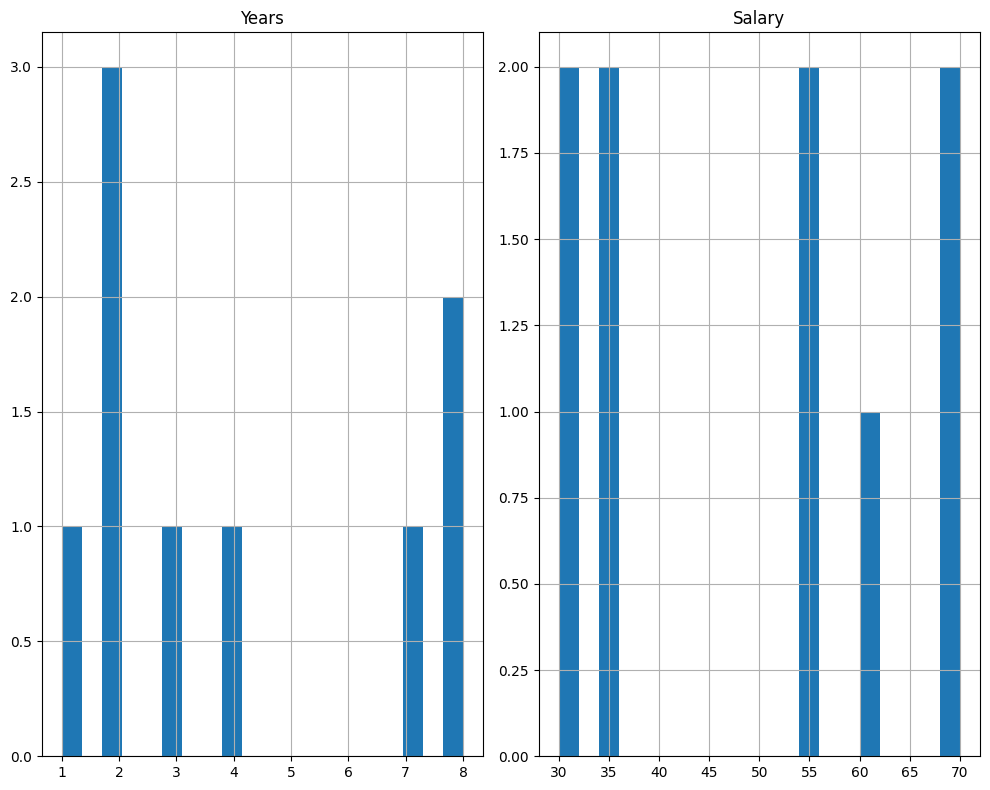

In [58]:
employee.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()


In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

#### What's the average salary in this company?

In [60]:
employee["Salary"].mean()

np.float64(48.888888888888886)

#### What's the highest salary?

In [61]:
employee["Salary"].max()

np.int64(70)

#### What's the lowest salary?

In [62]:
employee["Salary"].min()

np.int64(30)

#### Who are the employees with the lowest salary?

In [64]:
min_salary = employee["Salary"].min()
lowest_paid = employee[employee["Salary"] == min_salary]
print(lowest_paid)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Could you give all the information about an employee called David?

In [66]:
employee[employee["Name"]=="David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [68]:
employee["Salary"][employee["Name"]=="David"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [70]:
employee[employee["Title"]=="associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [71]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [73]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [83]:
conditionemployee = (employee["Title"]=="associate") & (employee["Salary"]>55)
result = employee[conditionemployee]
print(result)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [88]:
years = employee.groupby("Years")["Salary"].mean()
print(years)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


####  What is the average Salary per title?

In [90]:
titles = employee.groupby("Title")["Salary"].mean()
print(titles)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

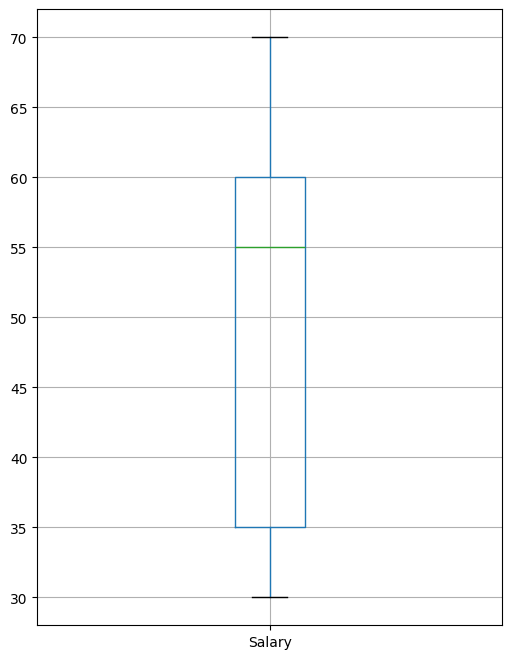

In [ ]:
employee.boxplot(column="Salary", figsize=(6,8))

plt.show()

In [98]:
q1 = employee["Salary"].quantile(0.25)
print(q1)

35.0


In [99]:
q3 = employee["Salary"].quantile(0.75)
print(q3)

60.0


#### Is the mean salary per gender different?

In [ ]:
gender = employee.groupby("Gender")["Salary"].mean()
print(gender)

#It is a little. 2.5 of a difference.

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [107]:
numeric_cols = employee.select_dtypes(include='number').columns
empgrou = employee.groupby("Department")[numeric_cols].agg(['min','max','mean'])
print(empgrou)


           Years               Salary           
             min max      mean    min max   mean
Department                                      
HR             2   8  4.666667     30  70  45.00
IT             1   8  4.500000     30  70  48.75
Sales          2   3  2.500000     55  55  55.00


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [116]:
#diff = employee.groupby("Department")["Salary"].agg(lambda x: x.max()-x.min())

grouped = employee.groupby("Department")["Salary"]
diff = grouped.max() - grouped.min()
print(diff)


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [117]:
orders = pd.read_csv("Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
orders.dtypes

'''
Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
'''

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [121]:
orders.head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


####  What is the average Purchase Price?

In [123]:
avg = orders["UnitPrice"].mean()
print(avg)

3.1161744805540756


#### What were the highest and lowest purchase prices? 

In [124]:
print(orders["UnitPrice"].min())
print(orders["UnitPrice"].max())

0.0
8142.75


#### Select all the customers we have in Spain

In [136]:
spanishcustomers = orders["CustomerID"][orders["Country"]=="Spain"]
print(spanishcustomers)


4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [140]:
counts = orders.loc[orders["Country"] == "Spain", "CustomerID"].value_counts()
print(len(counts))

30


#### Select all the customers who have bought more than 50 items ?

In [147]:
customers_over_50 = orders.groupby("CustomerID").filter(lambda x: x["Quantity"].sum() > 50)

customer_ids = customers_over_50["CustomerID"].unique()
print(customer_ids)


[17850 13047 12583 ... 13298 14569 12713]


#### Select orders from Spain that are above 50 items

In [148]:
orders_spain_above_50 = orders[(orders["Country"] == "Spain") & (orders["Quantity"] > 50)]
print(orders_spain_above_50)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
174443      248798     558871     20727  2011      7    1    1

#### Select all free orders

In [151]:
orders_free = orders[(orders["UnitPrice"] == 0)]
print(orders_free)
print(len(orders_free))


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [153]:
lunch_bag = orders[orders["Description"].str.contains("lunch bag", case=False, na=False)]
print(lunch_bag)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [158]:
lunch_bag_2011 = orders[(orders["Description"].str.contains("lunch bag", case=False, na=False))& (orders["year"]==2011)]
print(lunch_bag_2011)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
26341            lunch bag woodla

#### Show the frequency distribution of the amount spent in Spain.

In [160]:
spain_orders = orders[orders["Country"] == "Spain"]
freq_dist = spain_orders["Quantity"].value_counts().sort_index()

print(freq_dist)


Quantity
1      260
2      312
3      161
4      213
5       40
6      371
7        5
8       84
9       12
10      95
11       2
12     549
14       2
16      19
18      11
20      10
24     192
25      41
28       1
32      14
36      12
40       8
48      29
50       3
60       2
70       2
72       8
96       2
100      6
128      4
144      3
150      3
200      2
288      2
360      5
Name: count, dtype: int64


#### Select all orders made in the month of August

In [162]:
orders_august = orders[(orders["month"] == 8)]
print(orders_august)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476            scandinavian reds rib

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [163]:
august_per_countries = orders_august["Country"].value_counts()
print(august_per_countries)

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64


#### What's the  average amount of money spent by country

In [170]:

avg_spent_per_country = orders.groupby("Country")["amount_spent"].mean()
print(avg_spent_per_country)


Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [176]:
most_expensive = orders["UnitPrice"].max()
meitem  = orders[orders["UnitPrice"]==most_expensive]
print(meitem[["Description","UnitPrice"]])

       Description  UnitPrice
118352     postage    8142.75


#### What was the average amount spent per year ?

In [180]:
avgperyear = orders.groupby("year")["amount_spent"].mean()
print(avgperyear)

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64
